<a href="https://colab.research.google.com/github/Gail529/Recommendation-system/blob/master/nrc_song.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import string

In [ ]:
emo=pd.read_csv('/content/NRC-Emotion-Intensity-Lexicon-v1-ForVariousLanguages.txt',sep='\t')

In [ ]:
emo_df=emo.filter(items=['word','emotion','emotion-intensity-score'])
emo_df

In [ ]:
emo_df.head(50)

In [ ]:
emo_word=emo.loc[(emo['word'] == 'money') & (emo['emotion-intensity-score'] >= 0.5 )]
emo_word

,word,emotion,emotion-intensity-score,Afrikaans-af,Albanian-sq,Amharic-am,Arabic-ar,Armenian-hy,Azeerbaijani-az,Basque-eu,Belarusian-be,Bengali-bn,Bosnian-bs,Bulgarian-bg,Catalan-ca,Cebuano-ceb,Chinese (Simplified)-zh-CN,Chinese (Traditional)-zh-TW,Corsican-co,Croatian-hr,Czech-cs,Danish-da,Dutch-nl,Esperanto-eo,Estonian-et,Finnish-fi,French-fr,Frisian-fy,Galician-gl,Georgian-ka,German-de,Greek-el,Gujarati-gu,Haitian Creole-ht,Hausa-ha,Hawaiian-haw,Hebrew-iw,Hindi-hi,Hmong-hmn,Hungarian-hu,...,Myanmar (Burmese)-my,Nepali-ne,Norwegian-no,Nyanja (Chichewa)-ny,Pashto-ps,Persian-fa,Polish-pl,"Portuguese (Portugal, Brazil)-pt",Punjabi-pa,Romanian-ro,Russian-ru,Samoan-sm,Scots Gaelic-gd,Serbian-sr,Sesotho-st,Shona-sn,Sindhi-sd,Sinhala (Sinhalese)-si,Slovak-sk,Slovenian-sl,Somali-so,Spanish-es,Sundanese-su,Swahili-sw,Swedish-sv,Tagalog (Filipino)-tl,Tajik-tg,Tamil-ta,Telugu-te,Thai-th,Turkish-tr,Ukrainian-uk,Urdu-ur,Uzbek-uz,Vietnamese-vi,Welsh-cy,Xhosa-xh,Yiddish-yi,Yoruba-yo,Zulu-zu
1684,money,anticipation,0.586,geld,para,ገንዘብ,مال,դրամ,pul,dirua,грошы,টাকা,novac,пари,diners,salapi,钱,錢,soldi,novac,peníze,penge,geld,mono,raha,raha,argent,jild,diñeiro,ფული,Geld,χρήματα,મની,lajan,kudi,ke kālā,כֶּסֶף,पैसे,nyiaj,pénz,...,ပိုက်ဆံ,पैसा,penger,ndalama,پیسې,پول,pieniądze,dinheiro,NaN,bani,Деньги,tupe,airgead,новац,chelete,mari,پئسا,මුදල,peniaze,denar,lacag,dinero,duit,fedha,pengar,pera,пул,பணம்,డబ్బు,เงิน,para,гроші,پیسہ,pul,tiền bạc,arian,imali,געלט,owo,imali
5756,money,joy,0.531,geld,para,ገንዘብ,مال,դրամ,pul,dirua,грошы,টাকা,novac,пари,diners,salapi,钱,錢,soldi,novac,peníze,penge,geld,mono,raha,raha,argent,jild,diñeiro,ფული,Geld,χρήματα,મની,lajan,kudi,ke kālā,כֶּסֶף,पैसे,nyiaj,pénz,...,ပိုက်ဆံ,पैसा,penger,ndalama,پیسې,پول,pieniądze,dinheiro,NaN,bani,Деньги,tupe,airgead,новац,chelete,mari,پئسا,මුදල,peniaze,denar,lacag,dinero,duit,fedha,pengar,pera,пул,பணம்,డబ్బు,เงิน,para,гроші,پیسہ,pul,tiền bạc,arian,imali,געלט,owo,imali


In [ ]:
songs=pd.read_csv('/content/rock_songs.csv')
songs.shape


(180, 3)

In [ ]:
    import re
    import nltk
    nltk.download('punkt')
    nltk.download('wordnet')
    from nltk.stem import WordNetLemmatizer
    from nltk.tokenize import word_tokenize
    


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#analysing the emotions of each individual song
 
emo_songs_list=[]
id=0
for s in range(len(songs)):
    lyrics=songs.iloc[s,2]
    fline=re.sub('['+string.punctuation+']','',lyrics)# removing punctuations
    lemmatizer=WordNetLemmatizer()
    lyric=[]
    text=word_tokenize(fline)#tokenizing each word  in the song
 
    for word in text:
        new=lemmatizer.lemmatize(word)#lemmatizing the words
        lyric.append(new)#storing the lemmatized words 
 
#identify  emotional  words in the songs
    emo_song=emo_df.loc[(emo_df['word'].isin(lyric))  & (emo_df['emotion-intensity-score'] >= 0.4)]
    emo_song['id']=id#adds a column that uniquely identifies each song 
    id += 1
    emo_songs_list.append(emo_song)
# dataframe that contains all the emotional words of the songs
emo_new=pd.concat(emo_songs_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
emo_new.set_index(['id'],inplace=True)
emo_new.shape

(3635, 3)

In [ ]:
emo_new.to_csv('emo_new.csv')csv

In [ ]:
emo_new=pd.read_csv('/content/emo_new.csv')

In [ ]:
emo_new.tail(5)

,id,word,emotion,emotion-intensity-score
3630,179,problem,sadness,0.438
3631,179,wonder,surprise,0.523
3632,179,strange,surprise,0.477
3633,179,friend,trust,0.750
3634,179,hope,trust,0.680


In [ ]:
emo_new.head(50)

Text(0.5, 1.0, 'Song_Emotion')

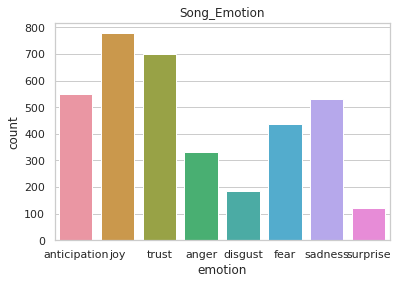

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',color_codes=True,palette='magma')
sns.countplot(emo_new['emotion'])
plt.title('Song_Emotion')

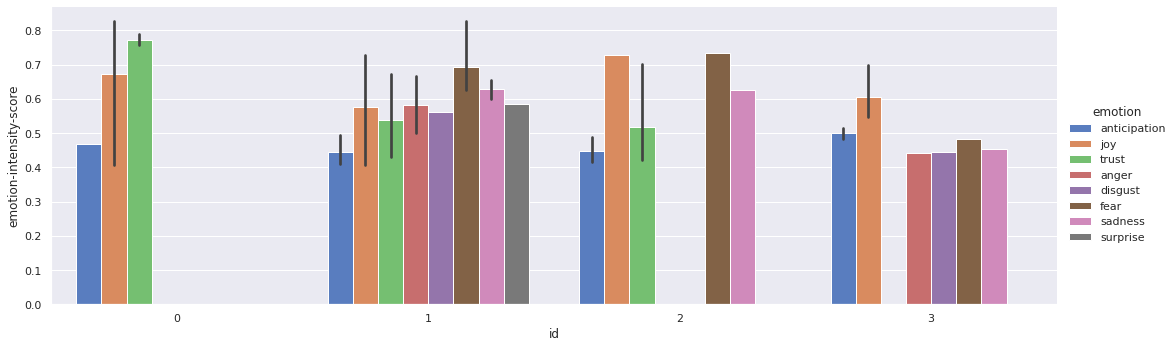

In [ ]:
data=emo_new.iloc[0:50,:]
sns.set(style='darkgrid')
g=sns.catplot(x='id',y='emotion-intensity-score',data=data,
              hue="emotion",kind="bar",palette="muted",height=5,aspect=3)


In [ ]:
lyrics=songs.iloc[1,2]
fline=re.sub('['+string.punctuation+']','',lyrics)
lemmatizer=WordNetLemmatizer()
lyric=[]
text=word_tokenize(fline)
for word in text:
    new=lemmatizer.lemmatize(word)
    lyric.append(new)
 
cp1=emo.loc[(emo['word'].isin(lyric))  & (emo['emotion-intensity-score'] >= 0.4)]
cp1

,word,emotion,emotion-intensity-score
339,enemy,anger,0.667
742,fear,anger,0.500
1851,wait,anticipation,0.523
2066,saint,anticipation,0.438
2134,sing,anticipation,0.411
2143,long,anticipation,0.406
2752,enemy,disgust,0.562
3556,fear,fear,0.828
3971,enemy,fear,0.625
3984,wicked,fear,0.625


In [ ]:
#selecting the song
lyrics=songs.iloc[2,2]
 
#removing the punctuation
fline=re.sub('['+string.punctuation+']','',lyrics)
lemmatizer=WordNetLemmatizer()
#the list that will store the lyrics
lyric=[]
text=word_tokenize(fline)
for word in text:#lemmatization
    new=lemmatizer.lemmatize(word)
    lyric.append(new)
#extracting emo
cp2=emo.loc[(emo['word'].isin(lyric))  & (emo['emotion-intensity-score'] >= 0.4)]
cp2

,word,emotion,emotion-intensity-score
1851,wait,anticipation,0.523
2022,pay,anticipation,0.461
2069,prepared,anticipation,0.438
2134,sing,anticipation,0.411
2143,long,anticipation,0.406
3699,scared,fear,0.734
5422,sing,joy,0.729
6846,lost,sadness,0.625
8470,prepared,trust,0.703
9426,pay,trust,0.430


In [ ]:
 import re
 fline=re.sub('['+string.punctuation+']','',lyrics)
 
lyric=[]
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
text=word_tokenize(fline)
stemmer=PorterStemmer()
#punctuations
for word in text:
    new=stemmer.stem(word)
    lyric.append(new)